In [1]:
import numpy as np
import matplotlib.pyplot as plt
from preseimei import movie_lc_ana
import glob

apertures = [10, 15, 20, 25]
bin_t = 10
obs_date = "20220111"
out_dir = "/alps/south/reduced/%s_analyzed/movies/*/g_band" % obs_date
names = glob.glob(out_dir + "*")

def x_mean(x):
    ''' Calculate mean of an array
    
    Args:
        x : numpy array of shape (n,num_bamd)
        
    Returns:
        x_mean_arr : numpy array of size n
        
    Todo:
        Remove 'for' to make faster
    '''
    n, num_band = np.shape(x)
    x_mean_arr = np.zeros(np.shape(x))
    for i in range(n):
        x_mean_arr[i] = np.mean(x[i])    
    return x_mean_arr


def flux_meddiv_and_subtract_1(lcs):
    nstar, nt = np.shape(lcs)
    flux_med_arr = x_mean(lcs)
    flux_div = np.zeros(np.shape(lcs))
    for i in range(nstar):
        flux_div[i] = (lcs[i]/flux_med_arr[i])-1
    return flux_div


def remove_sys(file):
    data = np.load(file)
    n_sub_comp=3
    time = data["time"]
    flux_target = data["flux_target"]
    flux_for_comp= data["flux_for_comp"]
    flux_med_arr = x_mean(flux_for_comp)
    flux_div = flux_meddiv_and_subtract_1(flux_for_comp)
    U, s ,V_svd = np.linalg.svd(flux_div, full_matrices = True)
    V_sub_from_lc = V_svd[:n_sub_comp] ## Component for subtraction 
    coeff_V = np.dot(flux_div, V_sub_from_lc.T) ## Coefficient for subtraction 
    flux_div_target = np.array([flux_target])
    flux_med_target = x_mean(flux_div_target )
    coeff_V_target = np.dot(flux_div_target, V_sub_from_lc.T) ## Coefficient for subtraction 
    sub_component_target = np.dot(coeff_V_target, V_sub_from_lc) ## Lightcurve for subtraction 
    after_subtracted_target = (flux_div_target-sub_component_target + 1) * flux_med_target ## Output after subtraction of systematics
    flux_target_pca = after_subtracted_target [0]/np.median(after_subtracted_target [0])
    return time, flux_target_pca
def take_name_lc(file):
    file_sp = file.split("/")
    target_name = file_sp[-3]
    band = file_sp[-2]
    lc_name = file_sp[-1].split("_")[-1].replace(".npz", "")
    return target_name, band, lc_name
def make_lc_name(target_name, out_dir, band, lc_name, obs_date):
    out_dir_lc_target = os.path.join( out_dir, target_name)
    if not os.path.exists( out_dir_lc_target ):
        os.makedirs( out_dir_lc_target )
    file_out = os.path.join( out_dir_lc_target , "%s_%s_%s" % (band, obs_date, lc_name))
    return file_out

In [19]:
import os
out_dir_lc = "/alps/south/reduced/lcs/" 

obs_dates = ["20220111", "20220112", "20220113", "20220114"]
bands = {"r_band", "g_band", "z_band"}
for obs_date in obs_dates:
    for band in bands:
        out_dir = "/alps/south/reduced/%s_analyzed/movies/*/%s" % (obs_date, band)
        names = glob.glob(out_dir + "*")        

        for name in names:
            try:
                
                files = glob.glob(name + "/target_and_others_*")
                files = sorted(files)
                print(name)
                for file in files:
                    print(file)
                    target_name, band, lc_name = take_name_lc(file)
                    file_lc_out = make_lc_name(target_name, out_dir_lc, band, lc_name, obs_date)
                    time_target, flux_target_pca= remove_sys(file)
                    data_g = np.load(file)
                    np.savez( file_lc_out, time = time_target, flux = flux_target_pca)
                    #file_out = 
                    #movie_lc_ana.show_periodogram_and_lc(time_target - np.min(time_target), flux_target_pca, maximum_period=1000, minimum_period=2)  
                    """
                    plt.figure(figsize = (10,8))
                    plt.plot(time_target, least_lc , label="g")
                    plt.legend()
                    plt.title("%s" % file.split("/")[-1])
                    plt.show()
                    """
            except:
                continue


/alps/south/reduced/20220111_analyzed/movies/WD_triccs26/r_band
/alps/south/reduced/20220111_analyzed/movies/WD_triccs26/r_band/target_and_others_450931644363332352_lc10.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs26/r_band/target_and_others_450931644363332352_lc15.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs26/r_band/target_and_others_450931644363332352_lc20.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs26/r_band/target_and_others_450931644363332352_lc25.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs12/r_band
/alps/south/reduced/20220111_analyzed/movies/WD_triccs12/r_band/target_and_others_1629292579563565696_lc10.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs12/r_band/target_and_others_1629292579563565696_lc15.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs12/r_band/target_and_others_1629292579563565696_lc20.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs12/r_band/target_and_others_16292925795635656

/alps/south/reduced/20220111_analyzed/movies/WD_triccs29/z_band/target_and_others_292454841560140032_lc30.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs28/z_band
/alps/south/reduced/20220111_analyzed/movies/WD_triccs28/z_band/target_and_others_328009783428208256_lc10.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs28/z_band/target_and_others_328009783428208256_lc15.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs28/z_band/target_and_others_328009783428208256_lc20.npz
/alps/south/reduced/20220111_analyzed/movies/WD_triccs28/z_band/target_and_others_328009783428208256_lc25.npz
/alps/south/reduced/20220111_analyzed/movies/WD_new22/z_band
/alps/south/reduced/20220111_analyzed/movies/WD_new22/z_band/target_and_others_3452373568124842752_lc10.npz
/alps/south/reduced/20220111_analyzed/movies/WD_new22/z_band/target_and_others_3452373568124842752_lc15.npz
/alps/south/reduced/20220111_analyzed/movies/WD_new22/z_band/target_and_others_3452373568124842752_lc20.npz
/

/alps/south/reduced/20220112_analyzed/movies/WD_triccs22/r_band/target_and_others_3014049448078210304_lc20.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs22/r_band/target_and_others_3014049448078210304_lc25.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs25/r_band
/alps/south/reduced/20220112_analyzed/movies/WD_triccs25/r_band/target_and_others_3251244858154433536_lc10.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs25/r_band/target_and_others_3251244858154433536_lc15.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs25/r_band/target_and_others_3251244858154433536_lc20.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs25/r_band/target_and_others_3251244858154433536_lc25.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs23/r_band
/alps/south/reduced/20220112_analyzed/movies/WD_triccs23/r_band/target_and_others_3201709827802584576_lc10.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs23/r_band/target_and_others_3201709827802

/alps/south/reduced/20220112_analyzed/movies/WD_triccs24/z_band/target_and_others_3273625554777257472_lc20.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs24/z_band/target_and_others_3273625554777257472_lc25.npz
/alps/south/reduced/20220112_analyzed/movies/WD_new31/g_band
/alps/south/reduced/20220112_analyzed/movies/WD_new31/g_band/target_and_others_366784816895496064_lc10.npz
/alps/south/reduced/20220112_analyzed/movies/WD_new31/g_band/target_and_others_366784816895496064_lc15.npz
/alps/south/reduced/20220112_analyzed/movies/WD_new31/g_band/target_and_others_366784816895496064_lc20.npz
/alps/south/reduced/20220112_analyzed/movies/WD_new31/g_band/target_and_others_366784816895496064_lc25.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs22/g_band
/alps/south/reduced/20220112_analyzed/movies/WD_triccs22/g_band/target_and_others_3014049448078210304_lc10.npz
/alps/south/reduced/20220112_analyzed/movies/WD_triccs22/g_band/target_and_others_3014049448078210304_lc15.npz
/al

/alps/south/reduced/20220113_analyzed/movies/WD_triccs18/r_band/target_and_others_898348313253395968_lc15.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs18/r_band/target_and_others_898348313253395968_lc20.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs18/r_band/target_and_others_898348313253395968_lc25.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs24/r_band
/alps/south/reduced/20220113_analyzed/movies/WD_triccs24/r_band/target_and_others_3273625554777257472_lc10.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs24/r_band/target_and_others_3273625554777257472_lc15.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs24/r_band/target_and_others_3273625554777257472_lc20.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs24/r_band/target_and_others_3273625554777257472_lc25.npz
/alps/south/reduced/20220113_analyzed/movies/WD_new13/r_band
/alps/south/reduced/20220113_analyzed/movies/WD_new13/r_band/target_and_others_1643814211883928320_lc

/alps/south/reduced/20220113_analyzed/movies/WD_triccs22/g_band/target_and_others_3014049448078210304_lc25.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs25/g_band
/alps/south/reduced/20220113_analyzed/movies/WD_triccs25/g_band/target_and_others_3251244858154433536_lc10.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs25/g_band/target_and_others_3251244858154433536_lc15.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs25/g_band/target_and_others_3251244858154433536_lc20.npz
/alps/south/reduced/20220113_analyzed/movies/WD_triccs25/g_band/target_and_others_3251244858154433536_lc25.npz
/alps/south/reduced/20220113_analyzed/movies/WD_new25/g_band
/alps/south/reduced/20220113_analyzed/movies/WD_new25/g_band/target_and_others_3421894079307215744_lc10.npz
/alps/south/reduced/20220113_analyzed/movies/WD_new25/g_band/target_and_others_3421894079307215744_lc15.npz
/alps/south/reduced/20220113_analyzed/movies/WD_new25/g_band/target_and_others_3421894079307215744_lc20.

NameError: name 'time' is not defined

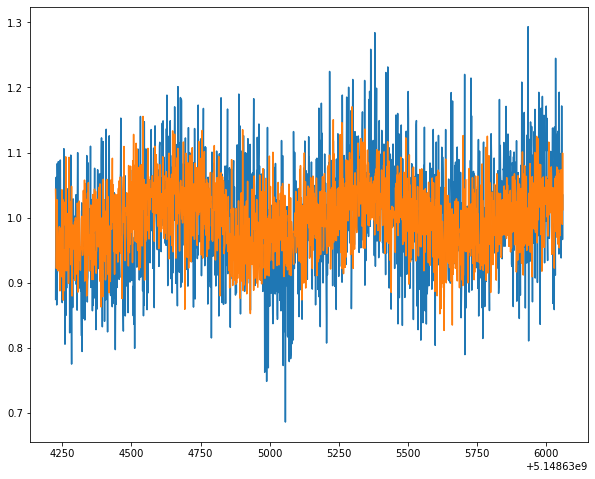

In [25]:

for aperture in apertures:
    file_g = "/alps/south/reduced/20220111_analyzed/movies/WD_triccs18/g_band/target_processed_898348313253395968_lc%d.npz" % aperture
    file_r = "/alps/south/reduced/20220111_analyzed/movies/WD_triccs18/r_band/target_processed_898348313253395968_lc%d.npz" % aperture
    data_g = np.load(file_g)
    data_r = np.load(file_r)
    lc_g = [data_g["time"], data_g["least_lc"]]
    lc_r = [data_r["time"], data_r["least_lc"]]
    lc_g_bin = movie_lc_ana.make_bin_lc(data_g["time"], data_g["least_lc"], bin_t)
    lc_r_bin = movie_lc_ana.make_bin_lc(data_r["time"], data_r["least_lc"], bin_t)

    plt.figure(figsize = (10,8))
    plt.plot(lc_r[0], lc_r[1], label="r")
    plt.plot(lc_g[0], lc_g[1], label="g")
    plt.plot(time, flux/np.median(flux))    
    plt.legend()
    plt.title("aperture%d, non-bin" % aperture)

    plt.show()
    plt.figure(figsize = (10,8))

    plt.plot(lc_r_bin.time.value, lc_r_bin.flux.value, label="r")
    plt.plot(lc_g_bin.time.value, lc_g_bin.flux.value, label="g")
    plt.plot(lc_z_bin.time.value, lc_z_bin.flux.value, label="z")
    plt.legend()
    plt.title("aperture%d, bin%d" % (aperture,bin_t))

    plt.show()



In [ ]:
names

In [ ]:
file= "/alps/south/reduced/20220111_analyzed/movies/WD_triccs18/z_band/target_and_others_898348313253395968_lc15.npz"

data = np.load(file)
time = data["time"]
flux = data["flux_target"]/np.median(flux)
lc_z_bin = movie_lc_ana.make_bin_lc(time, flux, 30)

